In [85]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from  matplotlib import style

In [86]:
df = pd.read_csv('student-mat.csv',delimiter = ';')
pd.set_option('display.max_columns', None)  

In [87]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


Text(0.5, 1.0, 'Student Grades Distribution')

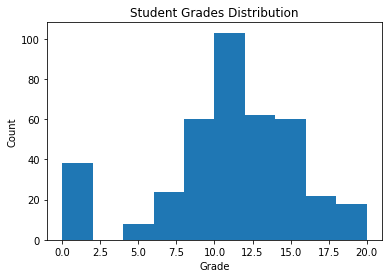

In [88]:
#Plotting a chart of grade distributions to learn more about the performance of the students in this data set

plt.hist(df['G3'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Student Grades Distribution')

In [89]:
#The plot helps identify that the grades for this data set are normally distributed. From here, I believe it is important to look
#for how the different variables are influencing the end grade. With more insight into the given metadata it can help me with
#predicting final grades for a student based on other variable factors.

In [90]:
#After playing around with the data and observing the initial data to trim unnecessary attributes

In [91]:
df = df[["G1","G2","G3","studytime","failures","absences"]]

In [92]:
df

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [93]:
#Attributes & Labels
predict = "G3"

X = np.array(df.drop([predict],1))
y = np.array(df[predict])

In [99]:
#Train & Test Data

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.1)


#highest = 0
#for i in range(100):
    
#    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.1)
    #Create a training model
#    linear = linear_model.LinearRegression()

#    linear.fit(x_train,y_train)
#    acc = linear.score(x_test, y_test)
#    print(acc)
    
#    if acc > highest:
#        highest = acc
#        with open("studentmodel.pickle", "wb") as f:
#            pickle.dump(linear,f)




In [100]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [101]:
#Using the variables from above I am able to acheive an accuracy above 80% which I am comfortable with to test the data.
#Below are the coefficients for my variables and the intercept which gives me the idea of how much weight each attribute has
#in defining the prediction

In [102]:
print('Coefficient: ', linear.coef_)
print('Intercept: ', linear.intercept_) 

Coefficient:  [ 0.14001811  0.98348613 -0.21819277 -0.30426458  0.04360711]
Intercept:  -1.3457264041875128


In [103]:
#Test predictions on test data
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

4.237070043326797 [6 5 2 0 6] 6
5.317124387040721 [7 6 1 0 0] 0
15.69014801756665 [16 15  2  0 11] 15
10.663648934799246 [11 11  2  0  2] 11
13.825008452902459 [15 14  4  0  4] 14
11.995991956206888 [11 12  2  0 10] 13
14.43582244134006 [15 14  2  0  8] 14
8.129535054813267 [ 6  9  1  2 14] 8
7.147381977330401 [ 9  7  2  0 18] 6
3.671162789792649 [6 5 2 1 0] 0
13.885103983075938 [12 14  1  0  0] 15
14.052240788368707 [16 14  4  0  6] 15
13.495943423621801 [15 13  2  0  9] 15
3.8893555609693635 [6 5 1 1 0] 0
12.527075765154825 [14 13  4  0  0] 14
9.434536914371623 [ 8 10  2  0  6] 10
12.858995938555005 [12 13  1  1  6] 14
13.443296747811223 [14 13  1  0  6] 13
12.56148609881483 [13 13  4  0  4] 12
5.3096421043037925 [8 7 2 3 0] 0
11.358059274900683 [ 8 12  1  0  0] 12
18.362789744648857 [19 18  3  0  0] 19
12.024567486029403 [14 12  2  1  8] 12
11.725309722791096 [10 12  1  0  2] 12
11.787153176462711 [12 12  2  0  2] 11
14.00672853977803 [11 14  1  0  6] 14
15.64669811961711 [16 15  1 

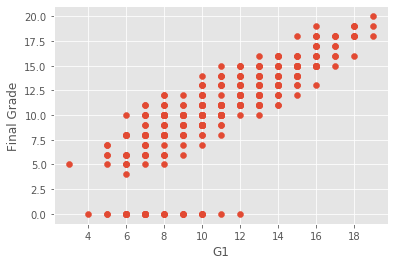

In [106]:
#Below I am playing arround with a scatter plot to observe correlations in the data among different variables.

style.use("ggplot")
p = "G1"
plt.scatter(df[p],df["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()